In [15]:
import pandas as pd
import matplotlib as mpl
from jedi.api.completion_cache import get_type
from matplotlib import pyplot
from pandas import Series

dataset_URL = "https://raw.githubusercontent.com/CheMBurN695/FinCrime_ML_Model/refs/heads/master/Trnx_Dataset.csv?token=GHSAT0AAAAAACYPUMUJEAPN5HXXFVREXQ4GZ3ILAOQ"
dataFrame = pd.read_csv(dataset_URL)

In [22]:
sowByCountry = dataFrame.groupby(["Country", "Source of Money"]).size()
# sowByCountry.plot(kind='bar', stacked=True, figsize=(10, 5), color=['red', 'blue'])
# pyplot.title("Origin countries vs Source of Funds")
# pyplot.xlabel("Country")
# pyplot.ylabel("Count")
# pyplot.legend(title="Source of Funds")
# pyplot.show()

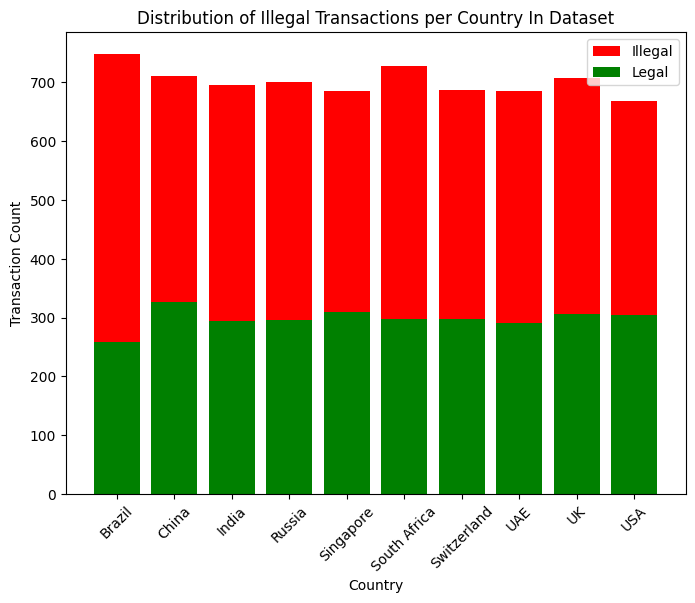

In [41]:
country_count = dataFrame.groupby(["Country"]).size()
illegal_trnxs = dataFrame['Source of Money'] == "Illegal"
illegal_trnx_byCountry = dataFrame[illegal_trnxs].groupby(["Country"]).size()
not_illegal_trnx_byCountry = country_count - illegal_trnx_byCountry
percent_illegal = (illegal_trnx_byCountry / country_count) * 100
percent_legal = (not_illegal_trnx_byCountry / country_count) * 100

_fig, _axes = pyplot.subplots(figsize=(8,6))
_axes.bar(illegal_trnx_byCountry.index, illegal_trnx_byCountry, color='red', label="Illegal")
_axes.bar(not_illegal_trnx_byCountry.index, not_illegal_trnx_byCountry, color='green', label="Legal")

_axes.set_title("Distribution of Illegal Transactions per Country In Dataset")
_axes.set_xlabel("Country")
_axes.set_ylabel("Transaction Count")
_axes.set_xticks(country_count.index)
_axes.set_xticklabels(country_count.index, rotation=45)
_axes.legend()
pyplot.show()
